# Выравнивание изображения

Чтобы сеть лучше извлекала фичи из изображения лица, его нужно выровнять.

In [1]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
from project.dg_face import utils, detection

ModuleNotFoundError: No module named 'project'

In [45]:
# detector = dlib.get_frontal_face_detector()
# sp = dlib.shape_predictor('utils/shape_predictor_5_face_landmarks.dat')

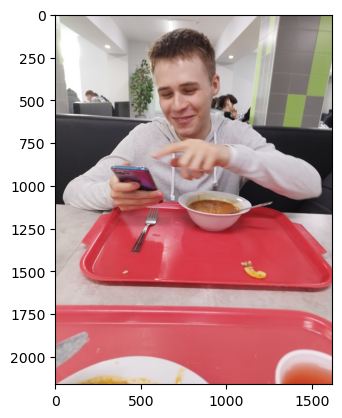

In [11]:
# img = cv2.cvtColor(cv2.imread("belikov.jpg"), cv2.COLOR_BGR2RGB)
img = utils.load_image("belikov.jpg")
plt.imshow(img)
plt.show()

In [16]:
faces = detection.detect_faces(img)

## Без выравнивания

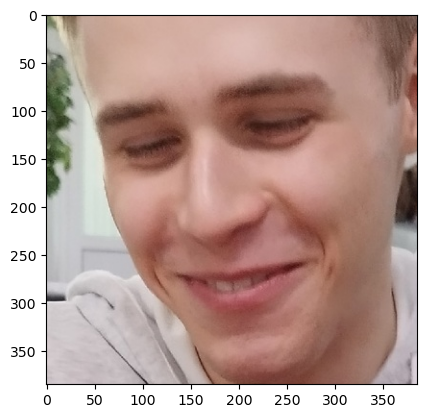

In [17]:
rect = faces[0]
ar = np.ascontiguousarray(img[rect.top(): rect.bottom(), rect.left(): rect.right()])
plt.imshow(ar)
plt.show()

## С выравниванием

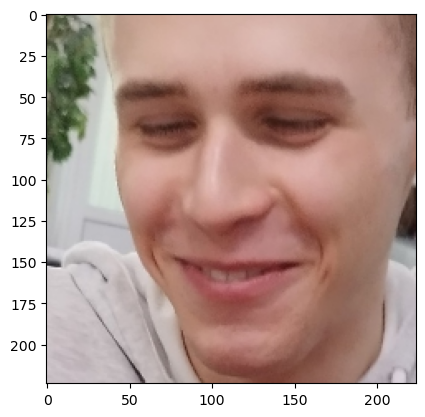

In [18]:
sp = dlib.shape_predictor('../utils/shape_predictor_5_face_landmarks.dat')

with_landmarks = dlib.full_object_detections()
for detection in faces:
    with_landmarks.append(sp(img, detection))

image = dlib.get_face_chip(img, with_landmarks[0], size=224)
plt.imshow(image)
plt.show()